# Calculating calibration densities and plotting models at UCB
- This workbook shows how we calculate densities for calibration data, plot models and calculate the cali lines

In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import os
import datetime

## Downloading DiadFit locally
- The easiest way to install diad fit is by removing the #. It will install from PyPI
- You only need to do this once on each computer, or run in order to grab an updated version. 

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [2]:
import DiadFit as pf
pf.__version__

'0.0.59'

## Import the data (after fitting and pressure matching)

In [3]:
caldata=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\UCB_4-10-23\merged_dataframe.xlsx").drop(columns={'Unnamed: 0'})
caldata['filename_merge']=caldata['filename_nocrr'].str.split(" ").str.get(1)
caldata.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,unix_timestamp,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge
0,105.279326,105.282756,105.275896,0.003430,003 FDCA-P1-1,105.542171,0.004575,0.003314,1280.792689,0.002797,...,1681137418,102,2023-04-10 14:36:59.349,2023-04-10 14:38:41.349,62.489000,0.000706,31.603516,0.002679,003 FDCA-P1-1,FDCA-P1-1
1,105.280584,105.283991,105.277176,0.003407,005 FDCA-P1-2,105.543392,0.004556,0.003291,1280.792692,0.002752,...,1681137703,102,2023-04-10 14:41:44.324,2023-04-10 14:43:26.324,62.473144,0.001202,31.611328,0.002685,005 FDCA-P1-2,FDCA-P1-2
2,105.290481,105.294046,105.286917,0.003565,007 FDCA-P1-3,105.553238,0.004772,0.003454,1280.781851,0.002908,...,1681138221,102,2023-04-10 14:50:20.292,2023-04-10 14:52:02.292,62.452215,0.001161,31.642578,0.003603,007 FDCA-P1-3,FDCA-P1-3
3,105.255939,105.259495,105.252382,0.003556,009 FDCA-P2-1,105.518561,0.004774,0.003446,1280.826030,0.002876,...,1681138533,102,2023-04-10 14:55:32.269,2023-04-10 14:57:14.269,59.265227,0.001133,31.650391,0.004547,009 FDCA-P2-1,FDCA-P2-1
4,105.255499,105.259088,105.251910,0.003589,011 FDCA-P2-2,105.518071,0.004790,0.003480,1280.826168,0.002959,...,1681138840,102,2023-04-10 15:00:41.247,2023-04-10 15:02:23.247,59.250048,0.001667,31.667969,0.003524,011 FDCA-P2-2,FDCA-P2-2


In [4]:
manualdata=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\UCB_4-10-23\Experiment_37C_4-10-23.xlsx")
manualdata.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,T4_manual,Offset,Unnamed: 12
0,FDCA-P1-1,0.648713,310.15,1.040000,64.871318,62.4879,37.002,37.006,37.011,37.012,37.012,6 min,NaN
1,FDCA-P1-2,NaN,NaN,NaN,NaN,62.4730,37.016,37.014,37.012,37.013,37.014,NaN,NaN
2,FDCA-P1-3,NaN,NaN,NaN,NaN,62.4508,36.997,37.001,37.004,37.005,37.005,NaN,NaN
3,FDCA-P2-1,0.592398,310.15,1.025959,59.239802,59.2656,36.989,36.989,36.988,36.987,36.988,NaN,NaN
4,FDCA-P2-2,NaN,NaN,NaN,NaN,59.2523,37.001,37.003,37.005,37.007,37.014,NaN,NaN


In [5]:
merged_df = pd.merge(right=caldata, left=manualdata, right_on='filename_merge',left_on='Label')
merged_df.to_clipboard(excel=True)

In [6]:
#creates a column with a new column that splits the filename to sample name (FDCA-P1-1 becomes FDCA-P1)
merged_df['filename_split'] = merged_df['filename_merge'].str.split('-', n=2).str[:2].str.join('-')
merged_df.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge,filename_split
0,FDCA-P1-1,0.648713,310.15,1.040000,64.871318,62.4879,37.002,37.006,37.011,37.012,...,102,2023-04-10 14:36:59.349,2023-04-10 14:38:41.349,62.489000,0.000706,31.603516,0.002679,003 FDCA-P1-1,FDCA-P1-1,FDCA-P1
1,FDCA-P1-2,NaN,NaN,NaN,NaN,62.4730,37.016,37.014,37.012,37.013,...,102,2023-04-10 14:41:44.324,2023-04-10 14:43:26.324,62.473144,0.001202,31.611328,0.002685,005 FDCA-P1-2,FDCA-P1-2,FDCA-P1
2,FDCA-P1-3,NaN,NaN,NaN,NaN,62.4508,36.997,37.001,37.004,37.005,...,102,2023-04-10 14:50:20.292,2023-04-10 14:52:02.292,62.452215,0.001161,31.642578,0.003603,007 FDCA-P1-3,FDCA-P1-3,FDCA-P1
3,FDCA-P2-1,0.592398,310.15,1.025959,59.239802,59.2656,36.989,36.989,36.988,36.987,...,102,2023-04-10 14:55:32.269,2023-04-10 14:57:14.269,59.265227,0.001133,31.650391,0.004547,009 FDCA-P2-1,FDCA-P2-1,FDCA-P2
4,FDCA-P2-2,NaN,NaN,NaN,NaN,59.2523,37.001,37.003,37.005,37.007,...,102,2023-04-10 15:00:41.247,2023-04-10 15:02:23.247,59.250048,0.001667,31.667969,0.003524,011 FDCA-P2-2,FDCA-P2-2,FDCA-P2


## Calculate mean T

In [7]:
merged_df['T_C_mean'] = merged_df[['T0_manual', 'T1_manual', 'T2_manual', 'T3_manual', 'T4_manual']].replace(0, np.nan).mean(axis=1, skipna=True)
merged_df['T_C_std'] = merged_df[['T0_manual', 'T1_manual', 'T2_manual', 'T3_manual', 'T4_manual']].replace(0, np.nan).std(axis=1, skipna=True)

merged_df['rho_gmL']=pf.calculate_rho_for_P_T(P_kbar=np.array(merged_df['median_pressure']/100),
                                               T_K=np.array(merged_df['T_C_mean']+273.15), EOS='SW96')

merged_df.to_clipboard(excel=True)
merged_df.to_excel(r"C:\Users\charl\Documents\Instruments and calibrations\UCB_4-10-23"+'/'+'merged_df_wrho.xlsx')
merged_df.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge,filename_split,T_C_mean,T_C_std,rho_gmL
0,FDCA-P1-1,0.648713,310.15,1.040000,64.871318,62.4879,37.002,37.006,37.011,37.012,...,62.489000,0.000706,31.603516,0.002679,003 FDCA-P1-1,FDCA-P1-1,FDCA-P1,37.0086,0.004450,1.034183
1,FDCA-P1-2,NaN,NaN,NaN,NaN,62.4730,37.016,37.014,37.012,37.013,...,62.473144,0.001202,31.611328,0.002685,005 FDCA-P1-2,FDCA-P1-2,FDCA-P1,37.0138,0.001483,1.034131
2,FDCA-P1-3,NaN,NaN,NaN,NaN,62.4508,36.997,37.001,37.004,37.005,...,62.452215,0.001161,31.642578,0.003603,007 FDCA-P1-3,FDCA-P1-3,FDCA-P1,37.0024,0.003435,1.034108
3,FDCA-P2-1,0.592398,310.15,1.025959,59.239802,59.2656,36.989,36.989,36.988,36.987,...,59.265227,0.001133,31.650391,0.004547,009 FDCA-P2-1,FDCA-P2-1,FDCA-P2,36.9882,0.000837,1.026057
4,FDCA-P2-2,NaN,NaN,NaN,NaN,59.2523,37.001,37.003,37.005,37.007,...,59.250048,0.001667,31.667969,0.003524,011 FDCA-P2-2,FDCA-P2-2,FDCA-P2,37.0060,0.005000,1.025970


## Plot of manually recorded pressure vs pressure transducer median and standard deviation over analysis duration

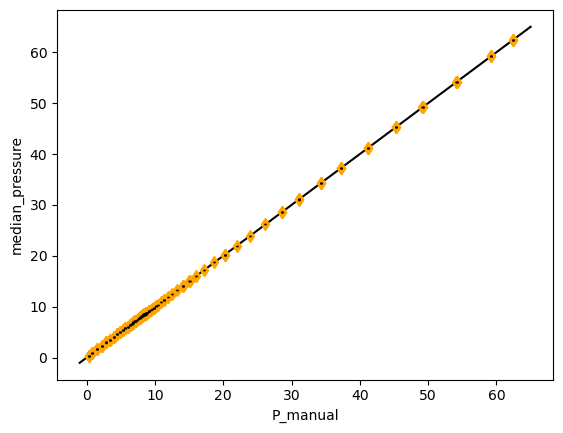

In [8]:
plt.errorbar(y=merged_df['median_pressure'],x=merged_df['P_manual'], yerr=merged_df['mad_pressure'], fmt='d',
             color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)

plt.plot([-1, 65], [-1,65], color='black', linestyle='-',zorder=-1)

plt.xlabel('P_manual')
plt.ylabel('median_pressure')
plt.show()

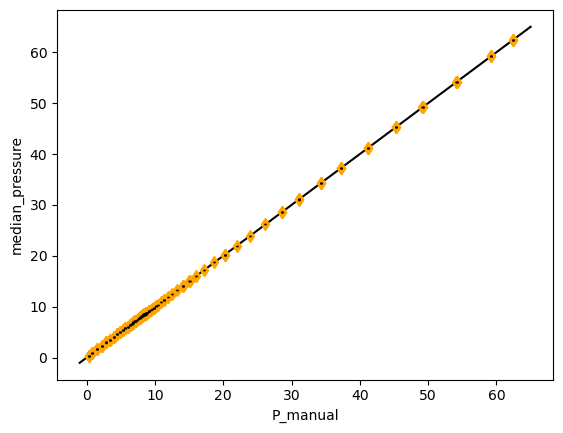

In [9]:
plt.errorbar(y=merged_df['median_pressure'],x=merged_df['P_manual'], yerr=merged_df['mad_pressure'], fmt='d',
             color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)

plt.plot([-1, 65], [-1,65], color='black', linestyle='-',zorder=-1)

plt.xlabel('P_manual')
plt.ylabel('median_pressure')
plt.show()

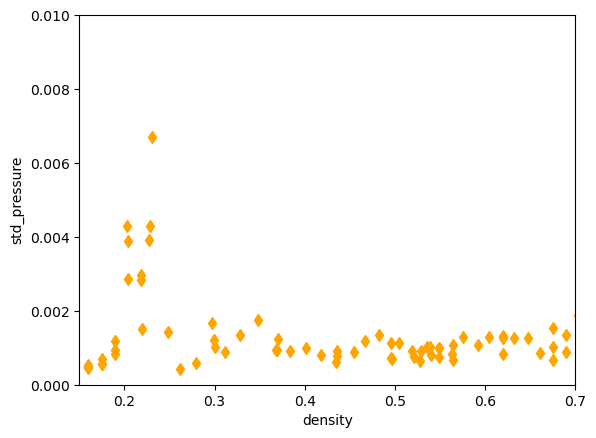

In [10]:
plt.errorbar(y=merged_df['mad_pressure'],x=merged_df['rho_gmL'],  fmt='d',
             color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)

# plt.plot([-1, 65], [-1,65], color='black', linestyle='-',zorder=-1)

plt.xlabel('density')
plt.ylabel('std_pressure')
plt.xlim([0.15,0.7])
plt.ylim([0,0.01])
plt.show()

## Plot of density vs fermi splitting

In [11]:
cornellpath=r"C:\Users\charl\Documents\Instruments and calibrations\FDCA_calibfiles_CORNELL\1-s2.0-S0009254121004654-mmc1.xlsx"
if os.path.exists(cornellpath):
    cornellcell=pd.read_excel(cornellpath)
    display(cornellcell.head())
cornellcell.columns

,Date,time,Date group,Raw file name,Sample type,v- position (cm-1),v+ position (cm-1),∆CO2 (cm-1),Ne corrected ∆CO2 (cm-1),P(Median-MPa),...,WANG vs EOS,LAM vs EOS,Neon data,1122 peak position (cm-1),1453 peak position (cm-1),∆Ne-m (cm-1),∆Ne-r (cm-1),1122 r (cm-1),1453 r (cm-1),"Comments (power-mW, integrationxaccumulations, associated Ne)"
0,11/29/2020,1900-01-01 01:20:58,NOV_2020,POC58,FDCA,1286.7182,1389.4400,102.7218,102.7817,0.037,...,0.020605,0.047001,NaN,1123.4561,1453.7410,330.2849,330.477634,1122.776289,1453.253923,56.590X5NE77
1,11/29/2020,1900-01-01 01:10:45,NOV_2020,POC57,FDCA,1286.7205,1389.4383,102.7178,102.7844,0.040,...,0.021512,0.047899,NaN,1123.4697,1453.7333,330.2636,330.477634,1122.776289,1453.253923,56.590X5NE76
2,11/29/2020,1900-01-01 00:54:26,NOV_2020,POC55,FDCA,1286.7079,1389.4321,102.7242,102.7868,0.061,...,0.022023,0.048400,NaN,1123.4566,1453.7330,330.2764,330.477634,1122.776289,1453.253923,56.590X3NE74
3,11/29/2020,1900-01-01 00:46:57,NOV_2020,POC54,FDCA,1286.6881,1389.4193,102.7312,102.7939,0.070,...,0.024418,0.050759,NaN,1123.4597,1453.7359,330.2762,330.477634,1122.776289,1453.253923,56.590X3NE72
4,09/18/2020,9:58:56 PM,SEPT_2020,CUC31,FDCA,1286.0110,1388.7926,102.7816,102.8011,0.083,...,0.026791,0.053084,NaN,1122.6997,1453.1146,330.4149,330.477600,1122.776300,1453.253900,Ne41


Index(['Date', 'time', 'Date group', 'Raw file name', 'Sample type',
       'v- position (cm-1)', 'v+  position (cm-1)', '∆CO2 (cm-1)',
       'Ne corrected ∆CO2  (cm-1)', 'P(Median-MPa)', 'P(MAD-MPa)', 'T (ID)',
       'T(median)', 'T(mad)', 'Densities (NOT SHIFTED)',
       'Density from EOS  (g/ml)', 'DEVITRE (g/ml)', 'Devitre24C(g/mL)',
       'Devitre MIXED (g/mL)', 'FALL 2011 (g/ml)', 'Rosso&Bodnar 1995 (g/ml)',
       'Kawakami 2003 (g/ml)', 'Yamamoto & Kagi 2006 3rd  (g/mL)',
       'Yamamoto & Kagi 2006 8th  (g/mL)', 'Song 2009 (g/ml)',
       'Wang 2011 (g/mL)', 'Lamadrid 2017 (g/mL)',
       'Density DIFFERENCES (NOT SHIFTED)', 'FALLvsEOS', 'DeV vs EOS',
       'DeV24 vs EOS', 'DeVMIX vs EOS', 'ROB 1995 vs EOS', 'KAWA vs EOS',
       'YAKA3 vsEOS', 'YAKA8 vs EOS', 'SONG vs EOS', 'WANG vs EOS',
       'LAM vs EOS', 'Neon data', '1122 peak position (cm-1)',
       '1453 peak position (cm-1)', '∆Ne-m (cm-1)', '∆Ne-r (cm-1)',
       '1122 r (cm-1)', '1453 r (cm-1)',
       'Comm

In [12]:
hpjune=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\UCB_6-7-23\merged_df_wrho.xlsx")
hpjune=hpjune.drop(columns=[col for col in hpjune.columns if 'Unnamed' in col])
hpjune.head()
hpjune.columns



Index(['Label', 'P_kbar', 'T_K', 'CO2_dens_gcm3', 'P_Mpa_target', 'P_manual',
       'T0_manual', 'T1_manual', 'T2_manual', 'T3_manual', 'T4_manual',
       'Corrected_Splitting', 'Corr_Split+1σ', 'Corr_Split-1σ',
       'Corr_Split_1σ_val', 'filename_x', 'Splitting', 'Split_err_abs',
       'Split_err_quadrature', 'Diad1_Combofit_Cent', 'Diad1_cent_err',
       'Diad1_Combofit_Height', 'Diad1_Voigt_Cent', 'Diad1_Voigt_Area',
       'Diad1_Voigt_Sigma', 'Diad1_Residual', 'Diad1_Prop_Lor', 'Diad1_fwhm',
       'Diad1_refit', 'Diad2_Combofit_Cent', 'Diad2_cent_err',
       'Diad2_Combofit_Height', 'Diad2_Voigt_Cent', 'Diad2_Voigt_Area',
       'Diad2_Voigt_Sigma', 'Diad2_Voigt_Gamma', 'Diad2_Residual',
       'Diad2_Prop_Lor', 'Diad2_fwhm', 'Diad2_refit', 'HB1_Cent', 'HB1_Area',
       'HB1_Sigma', 'HB2_Cent', 'HB2_Area', 'HB2_Sigma', 'C13_Cent',
       'C13_Area', 'C13_Sigma', 'Diad2_Gauss_Cent', 'Diad2_Gauss_Area',
       'Diad2_Gauss_Sigma', 'Diad1_Gauss_Cent', 'Diad1_Gauss_Area',
   

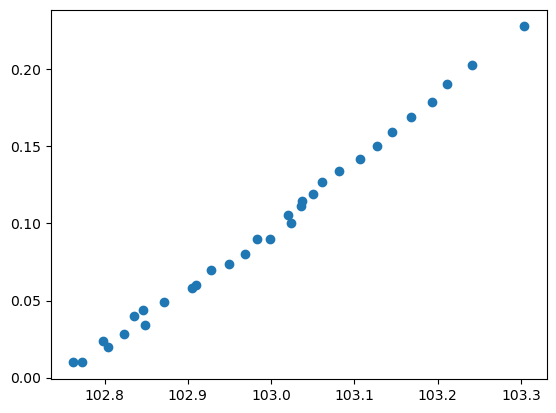

In [13]:

lpjune=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\Low_Density_forCharlotte_June.xlsx")
lpjune=lpjune.drop(columns=[col for col in lpjune.columns if 'Unnamed' in col])
lpjune['Corr_Split_1σ_val']=lpjune['Corr_Split+1σ']-lpjune['Corrected_Splitting']
lpjune.head()
#lpjune.columns
plt.scatter(lpjune['Corrected_Splitting'],lpjune['CO2_density_EOS'])

In [14]:
mpjune=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\Medium_densitY_June_forCharlote.xlsx")
mpjune=mpjune.drop(columns=[col for col in mpjune.columns if 'Unnamed' in col])
mpjune['Corr_Split_1σ_val']=mpjune['Corr_Split+1σ']-mpjune['Corrected_Splitting']
mpjune.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,...,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,CO2_density_EOS,Corr_Split_1σ_val
0,104.422015,104.423441,104.420589,03 C1_CRR_DiadFit,104.671247,0.001651,0.001224,1282.606952,0.001086,18686.480015,...,NaN,30,4,5,"['0h', '2m', '2s']",11:18:18 AM\n,40698,1325.004,inf,0.001426
1,104.420951,104.422362,104.419539,05 C2_CRR_DiadFit,104.670539,0.001651,0.001208,1282.612061,0.001045,19512.179599,...,NaN,30,4,5,"['0h', '2m', '2s']",11:24:50 AM\n,41090,1325.004,inf,0.001411
2,104.414134,104.415639,104.412629,07 C3_CRR_DiadFit,104.664331,0.001788,0.001318,1282.651066,0.001156,17925.398193,...,NaN,30,4,5,"['0h', '2m', '2s']",11:36:26 AM\n,41786,1325.004,inf,0.001505
3,104.413476,104.414925,104.412028,08 C4_CRR_DiadFit,104.663793,0.001713,0.001253,1282.652596,0.001082,17922.120655,...,NaN,30,4,5,"['0h', '2m', '1s']",11:38:44 AM\n,41924,1325.004,inf,0.001448
4,104.323850,104.325410,104.322290,11 C5_CRR_DiadFit,104.575644,0.001899,0.001384,1282.893886,0.001187,9321.585955,...,NaN,30,4,5,"['0h', '2m', '2s']",12:12:06 PM\n,43926,1325.004,0.68764,0.001560


In [15]:
mpjune_hpsens=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\UCB_6-8-23\merged_df_wrho.xlsx")
mpjune_hpsens=mpjune_hpsens.drop(columns=[col for col in mpjune_hpsens.columns if 'Unnamed' in col])
mpjune_hpsens.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge,filename_split,T_C_mean,T_C_std,rho_gmL
0,FDCA-P28-1,0.095909,310.15,0.660905,9.590924,9.6752,36.975,36.976,36.976,36.976,...,9.673804,0.000595,32.446289,0.000977,58 FDCA-P28-1,FDCA-P28-1,58 FDCA-P28,36.9756,0.000548,0.666442
1,FDCA-P29-1,0.093876,310.15,0.646865,9.387566,9.4594,37.002,37.003,37.003,37.003,...,9.250386,0.000533,32.447266,0.001210,56 FDCA-P29-1,FDCA-P29-1,56 FDCA-P29,37.0028,0.000447,0.635696
2,FDCA-P30-1,0.092172,310.15,0.632824,9.217169,9.2497,36.978,36.980,36.981,36.982,...,9.253401,0.000711,32.433105,0.004123,55 FDCA-P30-1,FDCA-P30-1,55 FDCA-P30,36.9808,0.001924,0.636492
3,FDCA-P31-1,0.090746,310.15,0.618784,9.074609,9.0269,36.995,36.994,36.993,36.993,...,9.027366,0.000695,32.666016,0.001157,53 FDCA-P31-1,FDCA-P31-1,53 FDCA-P31,36.9932,0.001483,0.613721
4,FDCA-P32-1,0.089553,310.15,0.604743,8.955350,8.9823,37.015,37.015,37.015,37.016,...,8.981870,0.000870,32.707520,0.003147,52 FDCA-P32-1,FDCA-P32-1,52 FDCA-P32,37.0156,0.000894,0.607595


In [16]:
rho_cornell=pf.calculate_density_cornell(temp='SupCrit', Split=merged_df['Corrected_Splitting'])
merged_df['cornellEQ_predrho']=rho_cornell['Preferred D']
merged_df.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge,filename_split,T_C_mean,T_C_std,rho_gmL,cornellEQ_predrho
0,FDCA-P1-1,0.648713,310.15,1.040000,64.871318,62.4879,37.002,37.006,37.011,37.012,...,0.000706,31.603516,0.002679,003 FDCA-P1-1,FDCA-P1-1,FDCA-P1,37.0086,0.004450,1.034183,1.025790
1,FDCA-P1-2,NaN,NaN,NaN,NaN,62.4730,37.016,37.014,37.012,37.013,...,0.001202,31.611328,0.002685,005 FDCA-P1-2,FDCA-P1-2,FDCA-P1,37.0138,0.001483,1.034131,1.026039
2,FDCA-P1-3,NaN,NaN,NaN,NaN,62.4508,36.997,37.001,37.004,37.005,...,0.001161,31.642578,0.003603,007 FDCA-P1-3,FDCA-P1-3,FDCA-P1,37.0024,0.003435,1.034108,1.027984
3,FDCA-P2-1,0.592398,310.15,1.025959,59.239802,59.2656,36.989,36.989,36.988,36.987,...,0.001133,31.650391,0.004547,009 FDCA-P2-1,FDCA-P2-1,FDCA-P2,36.9882,0.000837,1.026057,1.021067
4,FDCA-P2-2,NaN,NaN,NaN,NaN,59.2523,37.001,37.003,37.005,37.007,...,0.001667,31.667969,0.003524,011 FDCA-P2-2,FDCA-P2-2,FDCA-P2,37.0060,0.005000,1.025970,1.020977


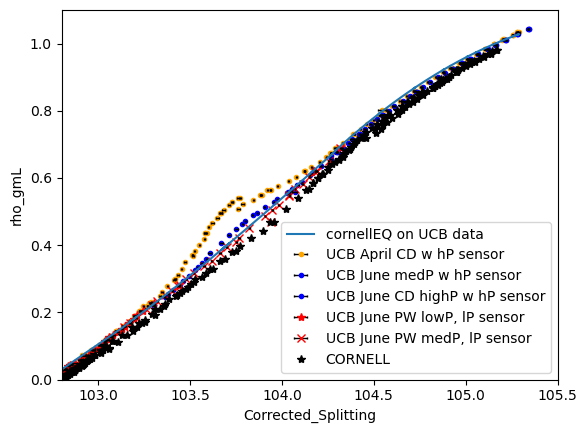

In [17]:
fig,ax=plt.subplots()

x='Corrected_Splitting'
y='rho_gmL'
y_pw='CO2_density_EOS'
ax.errorbar(x=merged_df[x],y=merged_df[y], fmt='.',xerr=merged_df['Corr_Split_1σ_val'],
             color='orange',mfc='orange', ecolor='black', capsize=1,elinewidth=1,barsabove=True,zorder=2,
           label='UCB April CD w hP sensor')

ax.errorbar(x=mpjune_hpsens[x],y=mpjune_hpsens[y], xerr=mpjune_hpsens['Corr_Split_1σ_val'], fmt='.',
             color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June medP w hP sensor')

ax.errorbar(x=hpjune[x],y=hpjune[y], xerr=hpjune['Corr_Split_1σ_val'], fmt='.',
             color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June CD highP w hP sensor')

ax.errorbar(x=lpjune[x],y=lpjune[y_pw], xerr=lpjune['Corr_Split_1σ_val'], fmt='*',
             color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June PW lowP, lP sensor')

ax.errorbar(x=mpjune[x],y=mpjune[y_pw], xerr=mpjune['Corr_Split_1σ_val'], fmt='x',
             color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June PW medP, lP sensor')
if os.path.exists(cornellpath):
  ax.errorbar(x=cornellcell['Ne corrected ∆CO2  (cm-1)'],y=cornellcell['Density from EOS  (g/ml)'], fmt='*',
              color='k',mfc='k', ecolor='black', capsize=1,barsabove=True,zorder=2,
            label='CORNELL')

ax.plot(merged_df[x],merged_df['cornellEQ_predrho'],label='cornellEQ on UCB data')

# ax2=ax.twinx()
# ax2.plot(merged_df['Corrected_Splitting'],merged_df['median_temp'],color='darkred')
# ax2.set_ylabel('Sensor_T')

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim([102.8,105.5])
ax.set_ylim([0,1.1])
plt.legend()


plt.show()

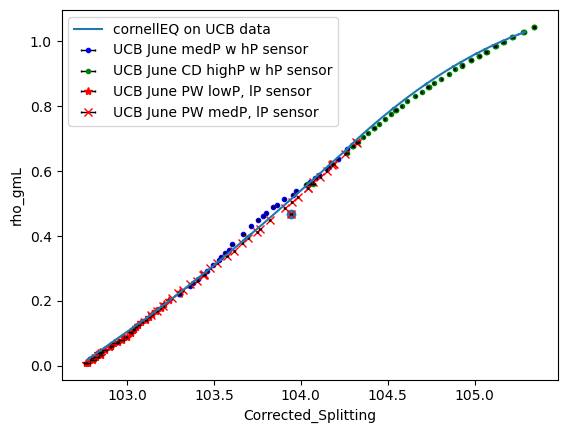

In [18]:
fig,ax=plt.subplots()

x='Corrected_Splitting'
y='rho_gmL'
y_pw='CO2_density_EOS'

# ax.errorbar(x=merged_df[x],y=merged_df[y], fmt='.',xerr=merged_df['Corr_Split_1σ_val'],
#              color='orange',mfc='orange', ecolor='black', capsize=1,elinewidth=1,barsabove=True,zorder=2,
#            label='UCB April CD w hP sensor')
ax.errorbar(x=mpjune_hpsens[x],y=mpjune_hpsens[y], xerr=mpjune_hpsens['Corr_Split_1σ_val'], fmt='.',
             color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June medP w hP sensor')

ax.errorbar(x=hpjune[x],y=hpjune[y], xerr=hpjune['Corr_Split_1σ_val'], fmt='.',
             color='green',mfc='green', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June CD highP w hP sensor')

ax.errorbar(x=lpjune[x],y=lpjune[y_pw], xerr=lpjune['Corr_Split_1σ_val'], fmt='*',
             color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June PW lowP, lP sensor')

ax.errorbar(x=mpjune[x],y=mpjune[y_pw], xerr=mpjune['Corr_Split_1σ_val'], fmt='x',
             color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June PW medP, lP sensor')

ax.scatter(mpjune[x][mpjune[y_pw].between(0.46,0.48)],mpjune[y_pw][mpjune[y_pw].between(0.46,0.48)])

ax.plot(merged_df[x],merged_df['cornellEQ_predrho'],label='cornellEQ on UCB data')

# ax2=ax.twinx()
# ax2.plot(merged_df['Corrected_Splitting'],merged_df['median_temp'],color='darkred')
# ax2.set_ylabel('Sensor_T')

ax.set_xlabel(x)
ax.set_ylabel(y)
# ax.set_xlim([104,104.5])
# ax.set_ylim([0.63,0.75])
plt.legend()


plt.show()

# Now let's pick the points to build the calibration line 

In [19]:
# Filter out bad ones from the high pressure sensor and concatenate the frames 
test=mpjune_hpsens.drop(columns=['Offset','filename_merge'])
hpsens_june=pd.concat([test,hpjune])

cali_pts_hpsens=hpsens_june[~(hpsens_june['rho_gmL'].between(0.325,0.63))]

# Filter out bad ones from low pressure sensor and concat frames
lpsens_june=pd.concat([lpjune,mpjune])
cali_pts_lpsens=lpsens_june[~(lpsens_june['CO2_density_EOS'].between(0.46,0.48))]
cali_pts_lpsens = cali_pts_lpsens.replace([np.inf, -np.inf], np.nan)

cali_pts_lpsens = cali_pts_lpsens.dropna(subset=['CO2_density_EOS'])

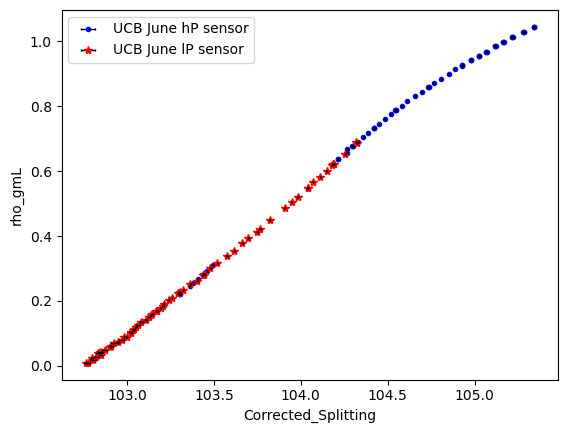

In [20]:
fig,ax=plt.subplots()

x='Corrected_Splitting'
y='rho_gmL'
y_pw='CO2_density_EOS'


ax.errorbar(x=cali_pts_hpsens[x],y=cali_pts_hpsens[y], xerr=cali_pts_hpsens['Corr_Split_1σ_val'], fmt='.',
             color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June hP sensor')


ax.errorbar(x=cali_pts_lpsens[x],y=cali_pts_lpsens[y_pw], xerr=cali_pts_lpsens['Corr_Split_1σ_val'], fmt='*',
             color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June lP sensor')

ax.set_xlabel(x)
ax.set_ylabel(y)

plt.legend()


plt.show()

## Merge the whole dataset for fitting

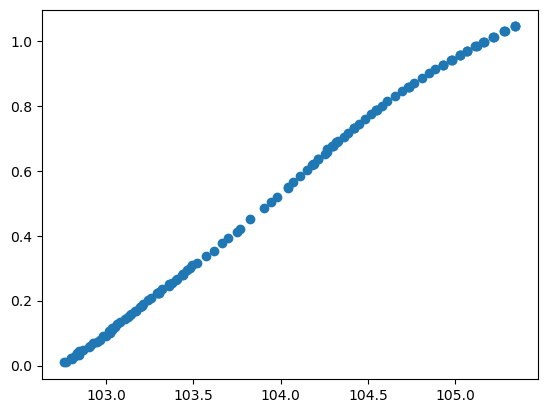

In [21]:
full=pd.concat([pd.DataFrame(data={'Split':cali_pts_hpsens[x],'rho':cali_pts_hpsens[y],'spliterr':cali_pts_hpsens['Corr_Split_1σ_val']}),pd.DataFrame(data={'Split':cali_pts_lpsens[x],'rho':cali_pts_lpsens[y_pw],'spliterr':cali_pts_lpsens['Corr_Split_1σ_val']})])
full_sort=full.sort_values('rho')
plt.scatter(full_sort['Split'],full_sort['rho'])

## Fit the calibration lines 

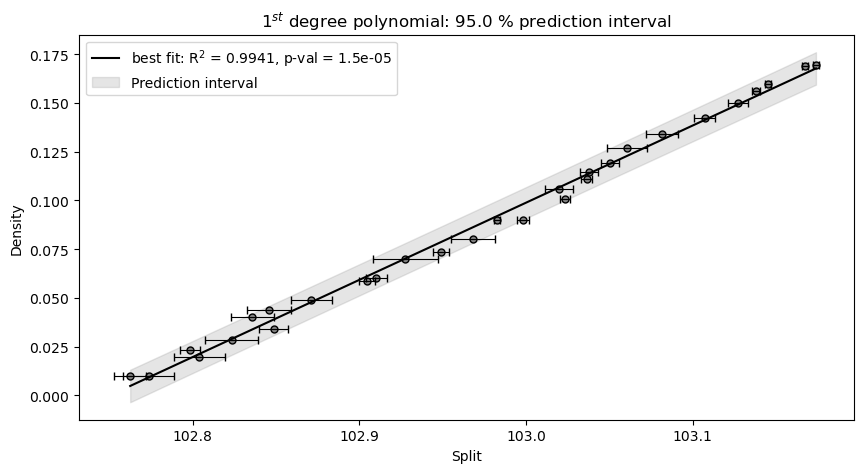

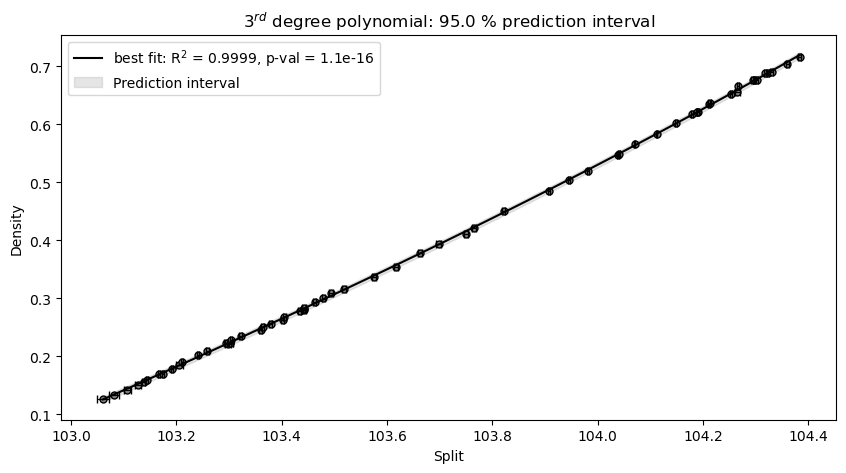

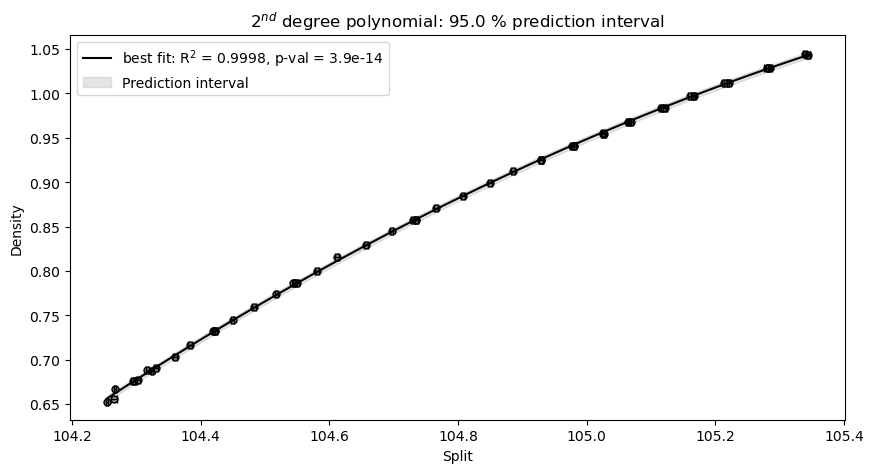

In [22]:
CI=0.95
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, density_range='Low',N_poly=1, CI=CI, std_error=True,save_fig=True)
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, density_range='Medium',N_poly=3, CI=CI, std_error=True,save_fig=True)
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, density_range='High',N_poly=2, CI=CI, std_error=True,save_fig=True)

In [26]:
pf.calculate_density_ucb(temp='SupCrit', Split=105.34, split_err=None)
#pf.calculate_density_cornell(temp='SupCrit', Split=105.3, split_err=None)

,Preferred D,in range,Notes,LowD_RT,HighD_RT,LowD_SC,MedD_SC,HighD_SC,Temperature,Splitting,Preferred_D
0,1.042191,Y,"SupCrit, high density",0.972667,1.038393,1.02537,1.289231,1.042191,SupCrit,105.34,NaN


In [27]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os
pf.__version__
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False
MasterFolder=r"C:\Users\charl\Documents\Data projects\Data\Fogo_FI"

if not os.path.exists(MasterFolder + '\FIGS'):
    os.mkdir(MasterFolder +'\FIGS')

if not os.path.exists(MasterFolder + '\OUTPUT'):
    os.mkdir(MasterFolder +'\OUTPUT')

figpath=MasterFolder +'\FIGS'
path=MasterFolder +'\OUTPUT'
## Read in data
files = os.listdir(path)
files_xls = [f for f in files if "FI_fitting_w_sec_phases" in f]
fg_fi=pd.DataFrame()
for f in files_xls:
    sheets = pd.read_excel(path+'/'+f, 'Sheet1')
    fg_fi = pd.concat([fg_fi,sheets],axis=0)
    fg_fi=fg_fi.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
    fg_fi['T_K']=1150+273.15
    fg_fi=fg_fi.reset_index(drop=True)

fg_fi.to_excel(path+'/'+'fg_fi.xlsx')
df=fg_fi.copy()
df

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,24hr_time,sec since midnight,Spectral Center,filename,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,T_K
0,104.188429,104.195859,104.180999,0.007430,03 FG04-A1-reg1-1_r1_CRR_DiadFit,104.437739,0.010247,0.007418,1283.116582,0.006246,...,1:31:51 PM\n,48711.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
1,104.165523,104.173196,104.157851,0.007672,05 FG04-A1-reg1-1_r2_CRR_DiadFit,104.415255,0.010760,0.007662,1283.135141,0.006017,...,1:39:40 PM\n,49180.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
2,104.149911,104.159438,104.140384,0.009527,06 FG04-A1-reg1-1_r3,104.399761,0.012360,0.009527,1283.148091,0.008861,...,1:42:17 PM\n,49337.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
3,104.137160,104.148515,104.125806,0.011355,08 FG04-A1-reg1-2_r1_CRR_DiadFit,104.387621,0.015984,0.011363,1283.200936,0.007163,...,1:53:18 PM\n,49998.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
4,104.112555,104.120841,104.104269,0.008286,10 FG04-A1-reg1-2_r2_CRR_DiadFit,104.363436,0.011707,0.008280,1283.218485,0.005996,...,2:01:53 PM\n,50513.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,104.186527,104.189643,104.183411,0.003116,FG04-A2-reg1-1-20mw_CRR_DiadFit,104.435273,0.004251,0.003054,1283.115280,0.002508,...,4:39:05 PM\n,59945.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
349,104.182845,104.186212,104.179478,0.003367,FG04-A2-reg1-1-20mwdown_CRR_DiadFit,104.431806,0.004557,0.003311,1283.114029,0.002818,...,4:44:31 PM\n,60271.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
350,104.203919,104.207586,104.200252,0.003667,FG04-A2-reg1-1-5mw_CRR_DiadFit,104.452560,0.004918,0.003618,1283.081616,0.003164,...,4:35:19 PM\n,59719.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
351,104.212521,104.216157,104.208886,0.003636,FG04-A2-reg1-1-5mwdown_CRR_DiadFit,104.461771,0.004934,0.003585,1283.068087,0.003051,...,4:49:30 PM\n,60570.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15


In [29]:
import pickle
pickle_str='Lowrho_polyfit_data.pkl'
with open(pickle_str, 'rb') as f:
    lowrho_pickle_data = pickle.load(f)
pickle_str='Mediumrho_polyfit_data.pkl'
with open(pickle_str, 'rb') as f:
    medrho_pickle_data = pickle.load(f)
pickle_str='Highrho_polyfit_data.pkl'
with open(pickle_str, 'rb') as f:
    highrho_pickle_data = pickle.load(f)

lowrho_model = lowrho_pickle_data['model']
medrho_model = medrho_pickle_data['model']
highrho_model = highrho_pickle_data['model']

LowD_SC=lowrho_model(df['Corrected_Splitting'])
MedD_SC=medrho_model(df['Corrected_Splitting'])
HighD_SC=highrho_model(df['Corrected_Splitting'])

In [30]:
LowD_SC

array([0.56940746, 0.56033803, 0.55415629, 0.54910764, 0.53936529,
       0.53692118, 0.54634325, 0.6047827 , 0.5977354 , 0.57604915,
       0.61957316, 0.5501621 , 0.5088541 , 0.56209365, 0.54293253,
       0.60417717, 0.60704579, 0.61125014, 0.60043944, 0.61219781,
       0.60838902, 0.60421597, 0.60443774, 0.85759834, 0.86152579,
       0.86701324, 0.81851131, 0.82954883, 0.83371552, 0.95004316,
       0.93270213, 0.95585624, 0.83502074, 0.80968473, 0.80603036,
       0.84244703, 0.83724623, 0.8574861 , 0.84392913, 0.86012817,
       0.86964404, 0.86999301, 0.94648415, 0.95851886, 0.93980259,
       0.8183646 , 0.81348566, 0.81493629, 0.72803757, 0.72835384,
       0.73885501, 0.81662095, 0.60401158, 0.59733213, 0.61406204,
       0.38175895, 0.41067898, 0.40314447, 0.44867732, 0.44576503,
       0.449532  , 0.49567588, 0.49291939, 0.48871896, 0.24243951,
       0.22007569, 0.65332397, 0.66186329, 0.65839046, 0.68367716,
       0.66991821, 0.67121182, 0.6616092 , 0.66232162, 0.66676